In [ ]:
# !pip install scispacy
# !pip install spacy
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_ner_bc5cdr_md-0.2.5.tar.gz

In [1]:
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
import os

# Custom module imports
from annotations import Entity, Relation
import utils

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Spacy imports
import scispacy
import spacy
from spacy import displacy
import en_ner_bc5cdr_md

In [2]:
DATA_DIR = 'data/'

# Loading processed entity - data
tags = utils.open_pickle('processed_data/tags')

### EDA

In [3]:
# Getting counts for different entities
entity_counts = defaultdict(int)

for entity_dict in tags:
    for key, value in entity_dict['entities'].items():
        entity_counts[value.name] += 1
        
# Convert defaultdict to dict
entity_counts = dict(entity_counts)

# Sort by value
entity_counts = {key: value for key, value in sorted(entity_counts.items(), 
                                                     key = lambda x: x[1], 
                                                     reverse = True)}

In [4]:
# Gettings counts for different relations
relation_counts = defaultdict(int)

for entity_dict in tags:
    for key, value in entity_dict['relations'].items():
        relation_counts[value.name] += 1
        
# Convert defaultdict to dict
relation_counts = dict(relation_counts)

# Sort by value
relation_counts = {key: value for key, value in sorted(relation_counts.items(), 
                                                       key = lambda x: x[1],
                                                       reverse = True)}

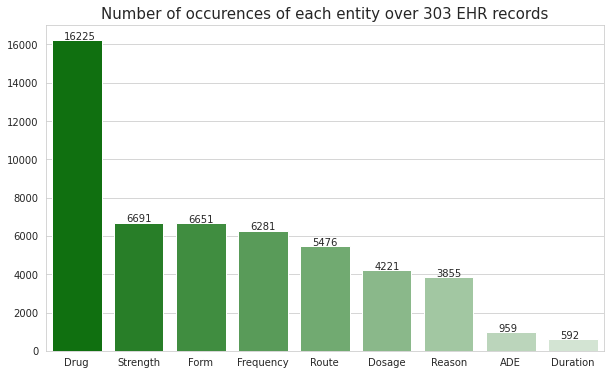

In [5]:
plt.figure(figsize = (10, 6))

sns.barplot(x = list(entity_counts.keys()), y = list(entity_counts.values()), 
            palette = sns.light_palette("green", n_colors = 10, reverse = True))

# Annotating counts
for i in range(len(entity_counts.values())):
    plt.text(x = i - 0.2, y = list(entity_counts.values())[i] + 40, 
             s = list(entity_counts.values())[i])
    
# Setting plot title
plt.title('Number of occurences of each entity over 303 EHR records', fontsize = 15)
plt.savefig('plots/entity_counts.jpg')
plt.show()

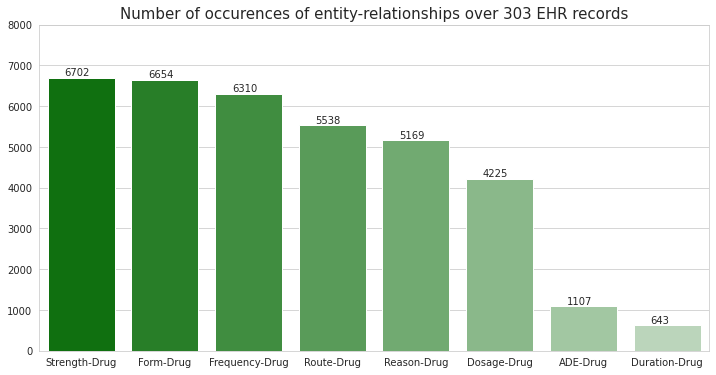

In [6]:
plt.figure(figsize = (12, 6))

sns.barplot(x = list(relation_counts.keys()), y = list(relation_counts.values()), 
            palette = sns.light_palette("green", n_colors = 10, reverse = True))

plt.ylim(0, 8000)

# Annotating counts
for i in range(len(relation_counts.values())):
    plt.text(x = i - 0.2, y = list(relation_counts.values())[i] + 40, 
             s = list(relation_counts.values())[i])
    
# Setting plot title
plt.title('Number of occurences of entity-relationships over 303 EHR records', fontsize = 15)
plt.savefig('plots/relation_counts.jpg')
plt.show()

### Scispacy

In [7]:
nlp = en_ner_bc5cdr_md.load()

In [7]:
ehr = []

for filename in os.listdir(DATA_DIR):
    if filename.endswith(".txt"):
        f = open(DATA_DIR + filename, 'r')
        raw_data = f.read()
        ehr.append(raw_data)
        f.close()

In [9]:
doc = nlp(ehr[0])

colors = {"DISEASE":"#D7BDE2", "CHEMICAL":"#F9E79F"}
options = {"ents":["DISEASE", "CHEMICAL"], "colors":colors}
displacy.render(doc, style = "ent", jupyter=True, options = options)

### Custom-built entity highlighter

In [7]:
ehr = utils.open_pickle("processed_data/ehr")

In [8]:
utils.display_ehr(ehr[0], tags[0])